In [ ]:
#pip install nba-api

In [1]:
from nba_api.stats.static import players
import nba_api.stats.endpoints
from nba_api.stats.static import teams
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.library.parameters import ContextMeasureSimple, LastNGames, LeagueID, Month, Period, SeasonTypeAllStar, AheadBehindNullable, ClutchTimeNullable, EndPeriodNullable, EndRangeNullable, GameSegmentNullable, LocationNullable, OutcomeNullable, PlayerPositionNullable, PointDiffNullable, PositionNullable, RangeTypeNullable, SeasonNullable, SeasonSegmentNullable, StartPeriodNullable, StartRangeNullable, ConferenceNullable, DivisionNullable

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
BBplayers = players.get_players()
BBteams = teams.get_teams()

In [4]:
print(type(players))
print(BBplayers[0])
print(len(BBplayers))

<class 'module'>
{'id': 76001, 'full_name': 'Alaa Abdelnaby', 'first_name': 'Alaa', 'last_name': 'Abdelnaby', 'is_active': False}
4501


In [6]:
durant = [player for player in BBplayers if player['full_name'] == 'Kevin Durant'][0]
print(durant["id"])
lakers = [name for name in BBteams if name['full_name']=='Oklahoma City Thunder'][0]
lakers_id = lakers['id']
print(lakers_id)

201142
1610612760


In [7]:
durant = shotchartdetail.ShotChartDetail(player_id='201142',team_id=1610612760)

In [8]:
NewDF=durant.get_data_frames()

In [36]:
df = NewDF[0]
list(df)

['GRID_TYPE',
 'GAME_ID',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_NAME',
 'PERIOD',
 'MINUTES_REMAINING',
 'SECONDS_REMAINING',
 'EVENT_TYPE',
 'ACTION_TYPE',
 'SHOT_TYPE',
 'SHOT_ZONE_BASIC',
 'SHOT_ZONE_AREA',
 'SHOT_ZONE_RANGE',
 'SHOT_DISTANCE',
 'LOC_X',
 'LOC_Y',
 'SHOT_ATTEMPTED_FLAG',
 'SHOT_MADE_FLAG',
 'GAME_DATE',
 'HTM',
 'VTM',
 'year']

In [10]:
df['year'] = pd.DatetimeIndex(df['GAME_DATE']).year
df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,year
0,Shot Chart Detail,0020700011,82,201142,Kevin Durant,1610612760,Seattle SuperSonics,1,4,31,...,Less Than 8 ft.,0,0,0,1,1,20071031,DEN,SEA,2007
1,Shot Chart Detail,0020700011,161,201142,Kevin Durant,1610612760,Seattle SuperSonics,2,10,3,...,24+ ft.,24,5,245,1,1,20071031,DEN,SEA,2007
2,Shot Chart Detail,0020700011,184,201142,Kevin Durant,1610612760,Seattle SuperSonics,2,7,55,...,Less Than 8 ft.,0,0,0,1,1,20071031,DEN,SEA,2007
3,Shot Chart Detail,0020700011,315,201142,Kevin Durant,1610612760,Seattle SuperSonics,3,10,34,...,16-24 ft.,20,151,141,1,1,20071031,DEN,SEA,2007
4,Shot Chart Detail,0020700011,347,201142,Kevin Durant,1610612760,Seattle SuperSonics,3,6,34,...,Less Than 8 ft.,0,0,0,1,1,20071031,DEN,SEA,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907,Shot Chart Detail,0021501209,306,201142,Kevin Durant,1610612760,Oklahoma City Thunder,3,11,26,...,24+ ft.,25,146,205,1,1,20160411,OKC,LAL,2016
5908,Shot Chart Detail,0021501209,354,201142,Kevin Durant,1610612760,Oklahoma City Thunder,3,7,37,...,8-16 ft.,11,6,116,1,1,20160411,OKC,LAL,2016
5909,Shot Chart Detail,0021501209,360,201142,Kevin Durant,1610612760,Oklahoma City Thunder,3,7,14,...,Less Than 8 ft.,2,-22,7,1,1,20160411,OKC,LAL,2016
5910,Shot Chart Detail,0021501209,366,201142,Kevin Durant,1610612760,Oklahoma City Thunder,3,6,45,...,24+ ft.,25,-97,232,1,1,20160411,OKC,LAL,2016


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [22]:
def shotchart(name, team, year):
    player_list = [player for player in BBplayers if player['full_name'] == str(name)][0]
    player_id = player_list["id"]
    team_list = [name for name in BBteams if name['full_name']== str(team)][0]
    team_id = team_list['id']
    
    shotchart = shotchartdetail.ShotChartDetail(player_id=str(player_id),team_id=int(team_id))
    
    chart_frames = shotchart.get_data_frames()
    df = chart_frames[0]
    df['year'] = pd.DatetimeIndex(df['GAME_DATE']).year
    df = df.loc[df['year'] == year]
    
    x = df["LOC_X"]
    y = df["LOC_Y"]
    
    plt.scatter(x,y, s=10, c='sandybrown')
    plt.xlim(-250,250)
    plt.ylim(-40, 400)

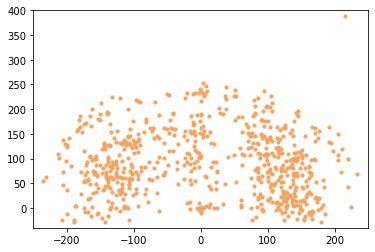

In [67]:
shotchart("Michael Jordan", "Chicago Bulls", 1997)